## ConvNet
We will not develop our convolutional neural network from the ground up but instead use tensorflow with a gpu to speed up the training. 

[Start_point](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=QwNmlfIC0YxM)

[VGG13 rchitecture](https://arxiv.org/pdf/1409.1556.pdf)

<img src="Proposal image.jpg">

In [1]:
###Test for Tensorflow install 
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import time
import gc

In [2]:
def load_data():
    train = np.load("Data/poke_train.npy")
    valid =  np.load("Data/poke_valid.npy")
    x_train = np.array(train[:,0].tolist()).astype('uint8')
    y_train = train[:,2]
    x_valid = np.array(valid[:,0].tolist()).astype('uint8')
    y_valid = valid[:,2]

    del train 
    del valid  
    gc.collect()
    
    #normalize all values
    x_train = x_train.astype('float32') / 255
    x_valid = x_valid.astype('float32') / 255
    
    # One-hot encode the labels
    y_train = tf.keras.utils.to_categorical(y_train, 136)
    y_valid = tf.keras.utils.to_categorical(y_valid, 136)
    
    return x_train, y_train, x_valid, y_valid



In [3]:
def Build_CNN():
    
    
    #VGG 11
    model = tf.keras.Sequential()

    # Input
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),  padding='same', activation='relu', input_shape=(80,80,3))) 
#     model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.55))
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.55))
    model.add(tf.keras.layers.Dense(136, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model; 

# Take a look at the model summary
model = Build_CNN()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)    

In [4]:
def model_train(drop_out):
    
    #load traning and validation data
    x_train, y_train, x_valid, y_valid = load_data()
    
    # Load the text lables 
    poke_labels = np.load("Data/poke_types.npy")
    
    model = Build_CNN()
   
    # x_valid, y_valid = x_test, y_test
#     NAME = "Poke_logs-{}".format(str(int(time.time())))
    NAME = "VGG11_Poke_logs-2k_drop_out_{}".format(str(drop_out))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelbestweights.hdf5', monitor='val_acc',
                                                      verbose = 1, save_best_only=True)
    model_info = model.fit(x_train,y_train,batch_size=256,epochs=50,
                         validation_data=(x_valid, y_valid),
                         callbacks=[checkpointer,tensorboard])
    
    #free some memory
    del x_train
    del y_train
    del x_valid
    del y_valid 
    gc.collect()

In [5]:
model_train(55)

Train on 72432 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
72192/72432 [============================>.] - ETA: 0s - loss: 4.0568 - acc: 0.1043
Epoch 00001: val_acc improved from -inf to 0.11380, saving model to modelbestweights.hdf5
72432/72432 [==============================] - 92s 1ms/sample - loss: 4.0562 - acc: 0.1044 - val_loss: 3.9573 - val_acc: 0.1138
Epoch 2/50
72192/72432 [============================>.] - ETA: 0s - loss: 3.6404 - acc: 0.1617
Epoch 00002: val_acc improved from 0.11380 to 0.18770, saving model to modelbestweights.hdf5
72432/72432 [==============================] - 90s 1ms/sample - loss: 3.6398 - acc: 0.1618 - val_loss: 3.4383 - val_acc: 0.1877
Epoch 3/50
72192/72432 [============================>.] - ETA: 0s - loss: 2.8605 - acc: 0.2838
Epoch 00003: val_acc improved from 0.18770 to 0.33830, saving model to modelbestweights.hdf5
72432/72432 [==============================] - 90s 1ms/sample - loss: 2.8585 - acc: 0

72192/72432 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9823
Epoch 00028: val_acc improved from 0.72040 to 0.72210, saving model to modelbestweights.hdf5
72432/72432 [==============================] - 84s 1ms/sample - loss: 0.0707 - acc: 0.9822 - val_loss: 1.8110 - val_acc: 0.7221
Epoch 29/50
72192/72432 [============================>.] - ETA: 0s - loss: 0.1150 - acc: 0.9722
Epoch 00029: val_acc did not improve from 0.72210
72432/72432 [==============================] - 83s 1ms/sample - loss: 0.1147 - acc: 0.9722 - val_loss: 1.7111 - val_acc: 0.7198
Epoch 30/50
72192/72432 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9863
Epoch 00030: val_acc did not improve from 0.72210
72432/72432 [==============================] - 83s 1ms/sample - loss: 0.0550 - acc: 0.9863 - val_loss: 1.9649 - val_acc: 0.6995
Epoch 31/50
72192/72432 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9892
Epoch 00031: val_acc did not improve from 0.72210
7

### Evaluate the model on test set

In [6]:
def eval_model():
    # Load the weights with the best validation accuracy
    model = Build_CNN()
    model.load_weights('VGG11_733_modelbestweights.hdf5')
    
    test =  np.load("Data/poke_test.npy")
    x_test = np.array(test[:,0].tolist())
    y_names = test[:,1]
    y_test = test[:,2]
    
    del test
    
    
    # Load the text lables 
    poke_labels = np.load("Data/poke_types.npy")
    
    x_test = x_test.astype('float32') / 255
    y_test = tf.keras.utils.to_categorical(y_test, 136)
    score = model.evaluate(x_test, y_test, verbose=0)

    print('\n', 'Test accuracy:', score[1])
    
    y_hat = model.predict(x_test)
    # Plot a random sample of 10 test images, their predicted labels and ground truth
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        # Display each image
        ax.imshow(np.squeeze(x_test[index]))
        predict_index = np.argmax(y_hat[index])
        true_index = np.argmax(y_test[index])
        # Set the title for each image
        ax.set_title("{}:{}".format(poke_labels[predict_index],poke_labels[true_index]),
                                      color=("green" if predict_index == true_index else "red"))
        ax.set_ylabel(y_names[index],fontsize='x-large')


 Test accuracy: 0.7307056


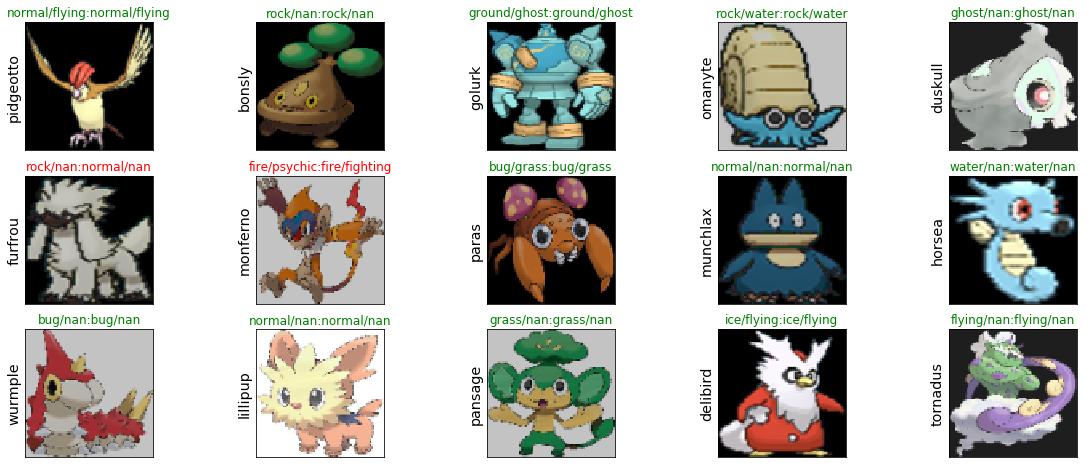

In [7]:
eval_model()

### Predition on otjer images and generated data

In [10]:
def predict_model():
    model = Build_CNN()
    model.load_weights('VGG11_733_modelbestweights.hdf5')

    predict =  np.load('Data/pokePredictionsGAN.npy')
    
    # Load the text lables 
    poke_labels = np.load("Data/poke_types.npy")

    y_hat = model.predict(predict)

    # Plot a random sample of 10 test images, their predicted labels and ground truth
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(predict.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        # Display each image
        ax.imshow(np.squeeze(predict[index]))
        predict_index = np.argmax(y_hat[index])
        # Set the title for each image
        ax.set_title("{}".format(poke_labels[predict_index]))
        
    plt.tight_layout()
    plt.show()

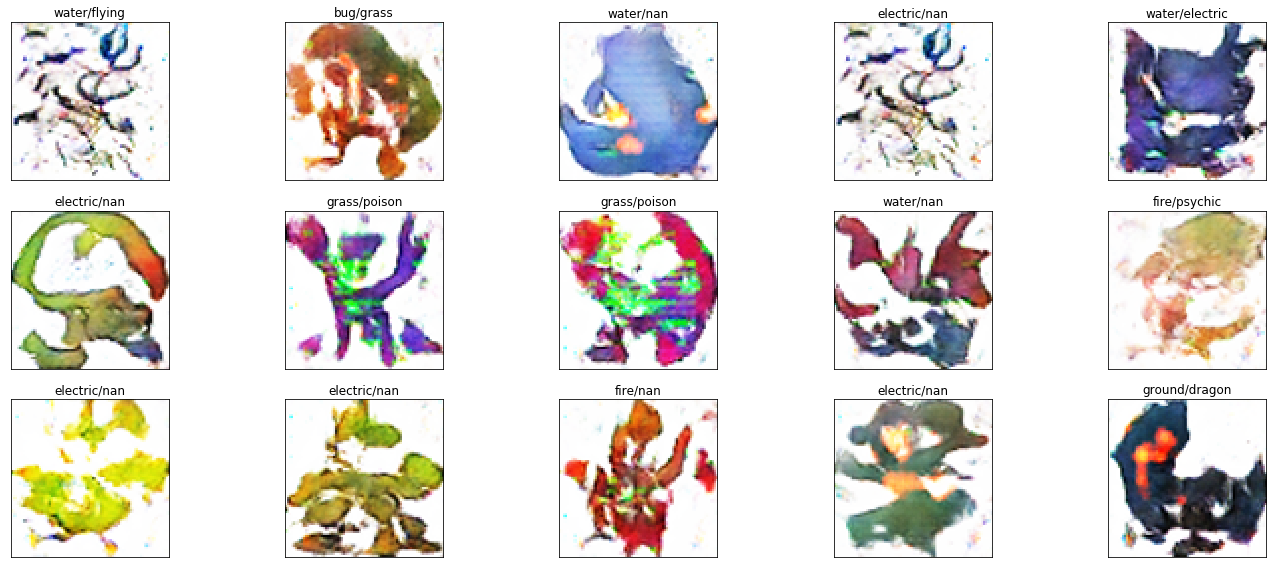

In [11]:
predict_model()

(1, 100, 100, 3)


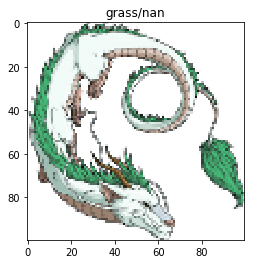

In [9]:
import cv2
def predict_image():
    fill_color = (255,255,255)
#     fill_color = (0,0,0)
    model = Build_CNN()
    model.load_weights('modelbestweights.hdf5')

    im = Image.open('Predictions/haku2.png')
    im = im.convert('RGBA')
    if im.mode in ('RGBA', 'LA'):
        background = Image.new(im.mode[:-1], im.size, fill_color)
        background.paste(im, im.split()[-1]) # omit transparency
        im = background
    im = im.convert('RGB')
    predict = np.array(im)
    
    predict = cv2.resize(predict, dsize=(80,80), interpolation=cv2.INTER_CUBIC)
    # Load the text lables 
    poke_labels = np.load("Data/poke_types.npy")
    
    predict = np.reshape(predict, (1,80,80,3))
    print (predict.shape)
    y_hat = model.predict(predict)

    # Display each image
    plt.title("{}".format(poke_labels[np.argmax(y_hat)]))
    plt.imshow(np.squeeze(predict))
    predict_index = np.argmax(y_hat)
    # Set the title for each image
    
    plt.show()
    
predict_image()